**Robert Lacher** <br>
**MATH 3332** <br>
**Section 52** <br>

# Problem Group B:
Using Monte Carlo method estimate the area of the hexagon whose vertices are at **(1,1),(0,2),(2,3),(3,3),(4,1),** and **(3,0)**. Describe the design of the Monte Carlo approach and snip the first 10 lines of the Excel sheet. Then compare the result by calculating area using elementary geometry.

## Imports
The program first starts by importing the necessary library. For this assignment I will be using **numpy** and the **matplotlib** libraries.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

## Constants
The program then defines several constants to use throughout the program. The program defines the X and Y limits, the number of points for the Monte Carlo, the number of points to be plotted, and the given vertices provided in the assignment prompt.

In [2]:
# Plot limits
X_MIN = 0
X_MAX = 4
Y_MIN = X_MIN
Y_MAX = X_MAX

# Number of points for Monte Carlo
NUM_POINTS = 10000
# Maximum number of points to plot
PLOT_POINTS = 100
# Modulus
MODULUS = int(NUM_POINTS / PLOT_POINTS)

# Number of times to conduct the Monte Carlo simulation
NUM_ITERATIONS = 5

# Vertices of polygon
# (1,1) included twice for plotting purposes
VERTICES = [
    (1., 1.),
    (0., 2.),
    (2., 3.),
    (3., 3.),
    (4., 1.),
    (3., 0.),
    (1., 1.),
]

## Main Program
Then the program enters the main portion to conduct the Monte Carlo simulation.

The simulation will be ran **NUM_ITERATION** times for **NUM_POINTS** randomly generated coordinates. If the random coordinates are within the area of the hexagon, the **num_inside** counter will be increased.

The area of the hexagon will then be computed as

$$ area_{hexagon} = {num\_inside \over NUM\_POINTS} \cdot area_{square} $$

Area Hexagon = 6.9712
Area Hexagon = 7.1808
Area Hexagon = 6.9888
Area Hexagon = 7.1408
Area Hexagon = 6.984
Area Square = 16
Average Area Hexagon = 7.05312


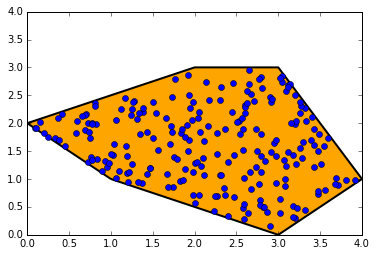

In [3]:
# Creates an MPL Path object
path = Path(VERTICES)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
# End Plotting

# Average area of the hexagon
average_area = []

# Iterate NUM_ITERATIONS times to conduct the Monte Carlo simulation
for iteration in xrange(NUM_ITERATIONS):
    
    # Counter to store number of points within polygon
    num_inside = 0
    
    # Create and store random points
    rand_x = np.random.uniform(low=X_MIN, high=X_MAX, size=NUM_POINTS)
    rand_y = np.random.uniform(low=X_MIN, high=X_MAX, size=NUM_POINTS)

    # Create tuples of (X, Y) coordinates
    points = zip(rand_x, rand_y)

    # Iterate over every point to determine if it is within polygon
    for index, point in enumerate(points):
    
        # Check that the point falls within the polygon
        if path.contains_points((point,)):
        
            # If it does, we'll plot the point and increment the counter
            # Using modulus to reduce number of points
            if index % MODULUS == 0: 
                plt.plot(point[0], point[1], 'bo')
            num_inside += 1
    
    # Print area for this iteration
    area = (num_inside / NUM_POINTS) * (X_MAX ** 2)
    print 'Area Hexagon = %s' % area
    average_area.append(area)
    
# Print overall results
print 'Area Square = %s' % (X_MAX ** 2)
print 'Average Area Hexagon = %s' % np.average(average_area)

# Using Geometry
The formula for the area of the irregular polygon is given [here](http://www.mathopenref.com/coordpolygonarea.html) as
$$ {(x_1 y_2 - y_1 x_2) +  (x_2 y_3 - y_2 x_3) \ldots ( x_{n} y_1 - y_{n} x_1 )} \over 2 $$

which equals 

$$ \left\lvert {{(1 \cdot 2 - 1 \cdot 0)+ (0 \cdot 3 - 2 \cdot 2) + (2 \cdot 3 - 3 \cdot 3)+ (3 \cdot 1 - 3 \cdot 4)+ (4 \cdot 0 - 1 \cdot 3) + (3 \cdot 1 - 0 \cdot 1)} \over {2} }\right\rvert = 7$$